In [1]:
# each of these keys are columns in final DF
prop_type_d = {
    'size': {"Small", "Tiny", "Bulky"},
    'chain type': {'Aliphatic', 'Aromatic'},
    'polar': {'Non-polar', 'Polar', 'Charged'},
    'hydrophobic': {'Hydrophobic'},
    'iron binding': {'Iron binding'},
    'order': {'Order promoting', 'Disorder promoting', 'Disorder promoting if in secstruct'},
    'carbonylation': {'Carbonylation susceptible'},
    'oxygen rich': {'Oxygen rich'},
    'photooxidation': {'Prone to photooxidation'},
    'pathogen': {'Pathogen enriched'},
    'TM stabilizing': {'TM stabilizing', 'TM to Thr stabilizing'},
    'common in': {"common in helix", "common in turn", "common in sheet"}
}

In [2]:
# Having to do this since there's a bug in ssbio

_aa_property_dict_one = {
    'Aliphatic': {'A', 'I', 'L', 'V'},
    'Aromatic' : {'F', 'H', 'W', 'Y'},
    'Non-polar': {'A', 'C', 'F', 'G', 'I', 'L', 'M', 'P', 'V', 'W', 'Y'},
'Polar'    : {'D', 'E', 'H', 'K', 'N', 'Q', 'R', 'S', 'T'},
'Charged'  : {'D', 'E', 'H', 'K', 'R'},
    'Basic'    : {'H', 'K', 'R'},
    'Acidic'   : {'D', 'E'},
#     'Small'    : {'A', 'C', 'D', 'G', 'N', 'P', 'S', 'T', 'V'}}  # I'm going to consider V in bulky according to paper that calls anything bigger than 18 A^2 as bulky https://www.sciencedirect.com/science/article/pii/0022519368900696
    'Small'    : {'A', 'C', 'D', 'G', 'N', 'P', 'S', 'T'},
    'Tiny'     : {'A', 'C', 'G', 'S', 'T'},
}

EXTENDED_AA_PROPERTY_DICT_ONE = {}
EXTENDED_AA_PROPERTY_DICT_ONE['Bulky'] = {'L', 'I', 'F', 'Y', 'V', 'W'}  # https://www.sciencedirect.com/science/article/pii/0022519368900696
EXTENDED_AA_PROPERTY_DICT_ONE['Hydrophobic'] = {'L', 'M', 'F', 'W', 'C', 'A', 'V', 'G', 'I', 'Y', 'H', 'T', 'S','P'}  # http://www.russelllab.org/aas/hydrophobic.html
EXTENDED_AA_PROPERTY_DICT_ONE['Iron binding'] = {'D', 'E', 'Y', 'H', 'C'}  # http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0007269
EXTENDED_AA_PROPERTY_DICT_ONE['Disorder promoting'] = {'P', 'E', 'S', 'K', 'Q', 'G'}  # https://www.sciencedirect.com/science/article/pii/S1570963912002889
EXTENDED_AA_PROPERTY_DICT_ONE['Disorder promoting if in secstruct'] = {'G', 'P'}  # https://www.sciencedirect.com/science/article/pii/S2211124714003751
EXTENDED_AA_PROPERTY_DICT_ONE['Order promoting'] = {'W', 'F', 'Y', 'I','M'}  # https://www.sciencedirect.com/science/article/pii/S2211124714003751 https://www.sciencedirect.com/science/article/pii/S1570963912002889#bb0185
EXTENDED_AA_PROPERTY_DICT_ONE['Carbonylation susceptible'] = {'P', 'R', 'K', 'T'}  # http://onlinelibrary.wiley.com/doi/10.1002/pmic.201100223/full
EXTENDED_AA_PROPERTY_DICT_ONE['Oxygen rich'] = {'D', 'E', 'N', 'Q', 'S', 'T', 'Y'}  # http://www.sciencedirect.com/science/article/pii/S2211124714003751
EXTENDED_AA_PROPERTY_DICT_ONE['Prone to photooxidation'] = {'C', 'H', 'W', 'M','Y'}  # listed in decreasing order, https://www.sciencedirect.com/science/article/pii/S1011134401002081
EXTENDED_AA_PROPERTY_DICT_ONE['Pathogen enriched'] = {'G', 'P', 'R', 'S'}  # https://www.sciencedirect.com/science/article/pii/S2211124714003751
EXTENDED_AA_PROPERTY_DICT_ONE['TM stabilizing'] = {'T', 'C', 'S'}  # http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0003343
EXTENDED_AA_PROPERTY_DICT_ONE['TM to Thr stabilizing'] = {'I', 'M', 'V', 'A'}  # http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0003343

# I've added these from the _human_readable_pepstats dictionary within ssbio/protein/sequence/properties/residues.py
EXTENDED_AA_PROPERTY_DICT_ONE["common in helix"] = {'V', 'I', 'Y', 'F', 'W', 'L'}
EXTENDED_AA_PROPERTY_DICT_ONE["common in turn"] = {'N', 'P', 'G', 'S'}
EXTENDED_AA_PROPERTY_DICT_ONE["common in sheet"] = {'E', 'M', 'A', 'L'}


from copy import deepcopy

def characterize_residue_mutation(res1, res2, use_extended_def=True):
    res1_props = []
    res2_props = []

    propdict = deepcopy(_aa_property_dict_one)

    if use_extended_def:
        propdict.update(EXTENDED_AA_PROPERTY_DICT_ONE)

    for prop, aa_list in propdict.items():  # bug is here; EXTENDED_AA_PROPERTY_DICT_ONE is used instead of propdict
        if res1 in aa_list:
            res1_props.append(prop)
        if res2 in aa_list:
            res2_props.append(prop)

    return {res1: res1_props,
            res2: res2_props}

In [3]:
import ssbio.protein.sequence.properties.residues as residue_props

In [4]:
import pandas as pd
# meta_muts = pd.read_pickle("./glpK_muts.pkl")  # TODO: rename to glpK_muts
meta_muts = pd.read_pickle("./gly_glpK_mut_df.pkl")  # TODO: rename to glpK_muts
meta_muts.head()

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,...,tech_rep,temperature,terminator,mutation size,truncation,AA range,subgenic features,AA change,conservation (SIFT),stability (ΔΔGpred)
0,{'Energy production and conversion': ['ECK1200...,[{'name': 'Energy production and conversion'}],S59Y (TCC→TAC),{'2.7.1.30': ['ECK120014723']},"[{'name': '2.7.1.30', 'significantly associate...",SNP,4117047.0,{},NC_000913,G→T,...,1.0,30 celsius,{},1,False,"(59, 59)","{GlpK subunit interface, Helix, GlpK subunit b...",S59Y,True,False
1,{'Energy production and conversion': ['ECK1200...,[{'name': 'Energy production and conversion'}],N229H (AAC→CAC),{'2.7.1.30': ['ECK120014723']},"[{'name': '2.7.1.30', 'significantly associate...",SNP,4116538.0,{},NC_000913,T→G,...,1.0,30 celsius,{},1,False,"(229, 229)","{GlpK subunit interface, Carbohydrate kinase N...",N229H,False,False
2,{'Energy production and conversion': ['ECK1200...,[{'name': 'Energy production and conversion'}],W54L (TGG→TTG),{'2.7.1.30': ['ECK120014723']},"[{'name': '2.7.1.30', 'significantly associate...",SNP,4117062.0,{},NC_000913,C→A,...,1.0,30 celsius,{},1,False,"(54, 54)","{GlpK subunit interface, Helix, Carbohydrate k...",W54L,False,False
3,{'Energy production and conversion': ['ECK1200...,[{'name': 'Energy production and conversion'}],T56A (ACC→GCC),{'2.7.1.30': ['ECK120014723']},"[{'name': '2.7.1.30', 'significantly associate...",SNP,4117057.0,{},NC_000913,T→C,...,1.0,30 celsius,{},1,False,"(56, 56)","{GlpK subunit interface, Helix, Carbohydrate k...",T56A,False,False
4,{'Energy production and conversion': ['ECK1200...,[{'name': 'Energy production and conversion'}],S59Y (TCC→TAC),{'2.7.1.30': ['ECK120014723']},"[{'name': '2.7.1.30', 'significantly associate...",SNP,4117047.0,{},NC_000913,G→T,...,1.0,30 celsius,{},1,False,"(59, 59)","{GlpK subunit interface, Helix, GlpK subunit b...",S59Y,True,False


In [5]:
aa_hydro_d = residue_props.kd_hydrophobicity_one
aa_bulki_d = residue_props.bulkiness_one

# This will make a table to inspect all of the changes for all of the mutations.

aa_flex_d = residue_props._aa_flexibility_dict_one


snps = meta_muts[meta_muts["Mutation Type"]=="SNP"]
SNP_AA_changes = snps[["AA change"]]
unique_SNP_AA_changes = SNP_AA_changes.drop_duplicates()  # Focused on AA positions and not mutation frequencies

df = pd.DataFrame()
for _, r in unique_SNP_AA_changes.iterrows():
    pos = int(r["AA change"][1:][:-1])
#     sub_genic_feats = _get_mut_subgenic_feats(r["AA range"], gff_df)  # TODO: if not on feature, populate this with "nearest" feature in 3D space.
    aa1 = r["AA change"][0]
    aa2 = r["AA change"][-1]
    props = characterize_residue_mutation(aa1, aa2, use_extended_def=True)
    d = {"position": pos, "AA": (aa1, aa2)}
    for k, v in prop_type_d.items():
        k1 = k + ' 1'
        ps = v & set(props[aa1])
        if ("Small" in ps) & ("Tiny" in ps):
            ps.remove("Small")
        d[k1] = ', '.join(ps)
        
        k2 = k + ' 2'
        ps = v & set(props[aa2])
        if ("Small" in ps) & ("Tiny" in ps):
            ps.remove("Small")
        d[k2] = ', '.join(ps)
        
        d["size diff"] = aa_bulki_d[aa2] - aa_bulki_d[aa1]
        d["hydrophob diff"] = aa_hydro_d[aa2] - aa_hydro_d[aa1]
        d["flex diff"] = aa_flex_d[aa2] - aa_flex_d[aa1]
        
    df = df.append(d, ignore_index=True)
    
df["position"] = df["position"].astype(int)
df = df.sort_values(by=["position", "AA"])
df = df.set_index("position")
df = df.sort_index(axis=1)
df


# This outputs the table in a smaller format for presentation
tdf = df[
    ((df.index>=50) & (df.index<=68))
#     | ((df.index>=72) & (df.index<=74))
#     | (df.index==173)  # Don't have previously existing functional analysis for this
  ]
# tdf[["AA", "chain type 1", "chain type 2", "size 1", "size 2", "size diff", "polar 1", "polar 2"]]
tdf

,AA,TM stabilizing 1,TM stabilizing 2,carbonylation 1,carbonylation 2,chain type 1,chain type 2,common in 1,common in 2,flex diff,...,oxygen rich 2,pathogen 1,pathogen 2,photooxidation 1,photooxidation 2,polar 1,polar 2,size 1,size 2,size diff
position,,,,,,,,,,,,,,,,,,,,,
54,"(W, L)",,,,,Aromatic,Aliphatic,common in helix,"common in helix, common in sheet",0.096,...,,,,Prone to photooxidation,,Non-polar,Non-polar,Bulky,Bulky,-0.27
55,"(A, T)",TM to Thr stabilizing,TM stabilizing,,Carbonylation susceptible,Aliphatic,,common in sheet,,0.080,...,Oxygen rich,,,,,Non-polar,Polar,Tiny,Tiny,4.27
56,"(T, A)",TM stabilizing,TM to Thr stabilizing,Carbonylation susceptible,,,Aliphatic,,common in sheet,-0.080,...,,,,,,Polar,Non-polar,Tiny,Tiny,-4.27
59,"(S, Y)",TM stabilizing,,,,,Aromatic,common in turn,common in helix,-0.297,...,Oxygen rich,Pathogen enriched,,,Prone to photooxidation,Polar,Non-polar,Tiny,Bulky,8.56
63,"(E, D)",,,,,,,common in sheet,,-0.119,...,Oxygen rich,,,,,"Charged, Polar","Charged, Polar",,Small,-1.89
65,"(L, M)",,TM to Thr stabilizing,,,Aliphatic,,"common in helix, common in sheet",common in sheet,0.005,...,,,,,Prone to photooxidation,Non-polar,Non-polar,Bulky,,-5.15
66,"(A, S)",TM to Thr stabilizing,TM stabilizing,,,Aliphatic,,common in sheet,common in turn,0.181,...,Oxygen rich,,Pathogen enriched,,,Non-polar,Polar,Tiny,Tiny,-2.03


In [6]:
aa_set = {'R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P', 'A', 'I', 'L', 'M', 'F', 'W', 'Y', 'V'}
from copy import deepcopy

def characterize_residue(res):
    res_props = []

    propdict = deepcopy(_aa_property_dict_one)
    propdict.update(EXTENDED_AA_PROPERTY_DICT_ONE)

    for prop, aa_list in propdict.items():
        if res in aa_list:
            res_props.append(prop)

    return {res: res_props}


aa_pos_prop_df = pd.DataFrame(columns=['AA']+list(prop_type_d.keys()))
for aa in aa_set:
    props = characterize_residue(aa)
    d = {"AA": aa}
    
    case = ''
    if aa == 'S':
        case = "WT"
    if aa == 'W':
        case = "Bystrom99"
    if aa == 'Y':
        case = "ALE"
    d["case"] = case
    
    for k, v in prop_type_d.items():
        ps = v & set(props[aa])
        if ("Small" in ps) & ("Tiny" in ps):
            ps.remove("Small")
        d[k] = ', '.join(ps)
        d["size val"] = aa_bulki_d[aa]
        d["hydrophobicity"] = aa_hydro_d[aa]
        d["flexibility"] = aa_flex_d[aa]
        
    aa_pos_prop_df = aa_pos_prop_df.append(d, ignore_index=True)
aa_pos_prop_df = aa_pos_prop_df.sort_values(by=["case", "size"], ascending=False)
aa_pos_prop_df = aa_pos_prop_df.set_index('AA', drop=True)
aa_pos_prop_df = aa_pos_prop_df[['case', 'size', 'chain type', 'polar', 'hydrophobic',
                                 'iron binding', 'order', 'carbonylation', 'oxygen rich',
                                 'photooxidation', 'pathogen', 'TM stabilizing', 'common in',
                                 'hydrophobicity', 'size val', "flexibility"]]
# df = df.reindex(['S', 'V', 'Y', 'N', 'D', 'E', 'C', 'F', 'I', 'P', 'R', 'M', 'G', 'H', 'A', 'L', 'K', 'T', 'Q', 'W'])
aa_pos_prop_df

,case,size,chain type,polar,hydrophobic,iron binding,order,carbonylation,oxygen rich,photooxidation,pathogen,TM stabilizing,common in,hydrophobicity,size val,flexibility
AA,,,,,,,,,,,,,,,,
S,WT,Tiny,,Polar,Hydrophobic,,Disorder promoting,,Oxygen rich,,Pathogen enriched,TM stabilizing,common in turn,-0.8,9.47,-0.424
W,Bystrom99,Bulky,Aromatic,Non-polar,Hydrophobic,,Order promoting,,,Prone to photooxidation,,,common in helix,-0.9,21.67,-0.727
Y,ALE,Bulky,Aromatic,Non-polar,Hydrophobic,Iron binding,Order promoting,,Oxygen rich,Prone to photooxidation,,,common in helix,-1.3,18.03,-0.721
A,,Tiny,Aliphatic,Non-polar,Hydrophobic,,,,,,,TM to Thr stabilizing,common in sheet,1.8,11.50,-0.605
T,,Tiny,,Polar,Hydrophobic,,,Carbonylation susceptible,Oxygen rich,,,TM stabilizing,,-0.7,15.77,-0.525
C,,Tiny,,Non-polar,Hydrophobic,Iron binding,,,,Prone to photooxidation,,TM stabilizing,,2.5,13.46,-0.692
G,,Tiny,,Non-polar,Hydrophobic,,"Disorder promoting if in secstruct, Disorder p...",,,,Pathogen enriched,,common in turn,-0.4,3.40,-0.537
N,,Small,,Polar,,,,,Oxygen rich,,,,common in turn,-3.5,12.82,-0.381
P,,Small,,Non-polar,Hydrophobic,,"Disorder promoting if in secstruct, Disorder p...",Carbonylation susceptible,,,Pathogen enriched,,common in turn,-1.6,17.43,-0.271


In [7]:
all_glpK_sift_df = pd.read_csv('../data/mutfunc_full/glpK_sift.tab', sep='\t', header=None)
all_glpK_sift_df.columns = ["acc","pos","ref","alt","score","median_ic","n_aa","n_seq"]
# Don't have to add 1 to position for this file,
# which makes sense in that mutfunc's webapp called the correct AAs with it's SIFT results.
aa59_glpK_sift_df = all_glpK_sift_df[all_glpK_sift_df["pos"]==59].copy()
aa59_glpK_sift_df = aa59_glpK_sift_df.set_index('alt', drop=True)
aa59_glpK_sift_df.head()

,acc,pos,ref,score,median_ic,n_aa,n_seq
alt,,,,,,,
A,P0A6F3,59,S,0.631117,2.755255,37.0,37
C,P0A6F3,59,S,0.033226,2.755255,37.0,37
D,P0A6F3,59,S,0.389037,2.755255,37.0,37
E,P0A6F3,59,S,0.839283,2.755255,37.0,37
F,P0A6F3,59,S,0.089743,2.755255,37.0,37


In [8]:
aa_pos_prop_df["SIFT (*≤0.05)"] = aa_pos_prop_df.apply(lambda r: aa59_glpK_sift_df.loc[r.name, "score"], axis=1)
aa_pos_prop_df

,case,size,chain type,polar,hydrophobic,iron binding,order,carbonylation,oxygen rich,photooxidation,pathogen,TM stabilizing,common in,hydrophobicity,size val,flexibility,SIFT (*≤0.05)
AA,,,,,,,,,,,,,,,,,
S,WT,Tiny,,Polar,Hydrophobic,,Disorder promoting,,Oxygen rich,,Pathogen enriched,TM stabilizing,common in turn,-0.8,9.47,-0.424,1.000000
W,Bystrom99,Bulky,Aromatic,Non-polar,Hydrophobic,,Order promoting,,,Prone to photooxidation,,,common in helix,-0.9,21.67,-0.727,0.010752
Y,ALE,Bulky,Aromatic,Non-polar,Hydrophobic,Iron binding,Order promoting,,Oxygen rich,Prone to photooxidation,,,common in helix,-1.3,18.03,-0.721,0.024042
A,,Tiny,Aliphatic,Non-polar,Hydrophobic,,,,,,,TM to Thr stabilizing,common in sheet,1.8,11.50,-0.605,0.631117
T,,Tiny,,Polar,Hydrophobic,,,Carbonylation susceptible,Oxygen rich,,,TM stabilizing,,-0.7,15.77,-0.525,0.471793
C,,Tiny,,Non-polar,Hydrophobic,Iron binding,,,,Prone to photooxidation,,TM stabilizing,,2.5,13.46,-0.692,0.033226
G,,Tiny,,Non-polar,Hydrophobic,,"Disorder promoting if in secstruct, Disorder p...",,,,Pathogen enriched,,common in turn,-0.4,3.40,-0.537,0.386961
N,,Small,,Polar,,,,,Oxygen rich,,,,common in turn,-3.5,12.82,-0.381,0.364775
P,,Small,,Non-polar,Hydrophobic,,"Disorder promoting if in secstruct, Disorder p...",Carbonylation susceptible,,,Pathogen enriched,,common in turn,-1.6,17.43,-0.271,0.170377


In [9]:
# getting interface regions from mutfunc's precalculated outputs
# Only 2 structures are currently being included with these interface regions (3EZW, 1GLB) and both of the AA sequences align with that in NC_000913.3
# Structure 3EZW best represents BOP27 GlpK of the two structures available since 1GLB already has a mutation to residue 65 (tetramer disruption)
# therefore can use the AA positions freely between all.

all_glpK_interface_df = pd.read_csv('../data/mutfunc_full/glpK_interfaces.tab', sep='\t', header=None)
all_glpK_interface_df.columns = ["pdb","prot_a","prot_b","evidence","chain","aa_wt","aa_mt","pdb_pos","uniprot_pos","mut","dG_wt","dG_mt","ddG","dG_wt_sd","dG_mt_sd", "ddG_sd"]
all_glpK_interface_df["NC_000913v3_pos"] = all_glpK_interface_df["uniprot_pos"] + 1  # Adding 1 to account for initiator methionine (start codon) within NC_000913v3 AA ref
aa59_glpK_interface_df = all_glpK_interface_df[all_glpK_interface_df["NC_000913v3_pos"]==59]
aa59_glpK_interface_df.head()

,pdb,prot_a,prot_b,evidence,chain,aa_wt,aa_mt,pdb_pos,uniprot_pos,mut,dG_wt,dG_mt,ddG,dG_wt_sd,dG_mt_sd,ddG_sd,NC_000913v3_pos
920,P0A6F3-P0A6F3-EXP-3ezw-pdb1-G-0-A-0.pdb,P0A6F3,P0A6F3,EXP,A,S,A,58,58,SA58A,-132.0122,-132.3828,-0.3706,0.081257,0.087084,0.028422,59
921,P0A6F3-P0A6F3-EXP-3ezw-pdb1-G-0-A-0.pdb,P0A6F3,P0A6F3,EXP,A,S,C,58,58,SA58C,-132.4656,-131.7994,0.6662,0.529819,0.566014,0.311644,59
922,P0A6F3-P0A6F3-EXP-3ezw-pdb1-G-0-A-0.pdb,P0A6F3,P0A6F3,EXP,A,S,D,58,58,SA58D,-132.7610,-124.1984,8.5626,0.821891,2.174160,1.478594,59
923,P0A6F3-P0A6F3-EXP-3ezw-pdb1-G-0-A-0.pdb,P0A6F3,P0A6F3,EXP,A,S,E,58,58,SA58E,-133.1226,-126.3764,6.7462,0.242409,0.367258,0.178591,59
924,P0A6F3-P0A6F3-EXP-3ezw-pdb1-G-0-A-0.pdb,P0A6F3,P0A6F3,EXP,A,S,F,58,58,SA58F,-132.9850,-121.7558,11.2292,0.576020,2.359770,1.959710,59


In [10]:
# In the case of glpK and uniprot_pos, they do align
all_glpK_exp_df = pd.read_csv('../data/mutfunc_full/glpK_exp.tab', sep='\t', header=None)
all_glpK_exp_df.columns=["pdb_id","chain","aa_wt","aa_mt","pdb_pos","uniprot_pos","uniprot_id","dG_wt","dG_mt","ddG","dG_wt_sd","dG_mt_sd","ddG_sd"]
aa59_glpK_exp_df = all_glpK_exp_df[all_glpK_exp_df["uniprot_pos"]==59]
aa59_glpK_exp_df

,pdb_id,chain,aa_wt,aa_mt,pdb_pos,uniprot_pos,uniprot_id,dG_wt,dG_mt,ddG,dG_wt_sd,dG_mt_sd,ddG_sd
1100,1bu6,O,S,A,58,59,P0A6F3,291.1056,290.2590,-0.8466,0.001140,0.000000,0.001140
1101,1bu6,O,S,C,58,59,P0A6F3,290.9240,290.1898,-0.7342,0.023130,0.009783,0.016453
1102,1bu6,O,S,D,58,59,P0A6F3,291.0608,290.7252,-0.3356,0.053354,0.092275,0.046544
1103,1bu6,O,S,E,58,59,P0A6F3,291.0258,290.3068,-0.7190,0.110285,0.141676,0.067034
1104,1bu6,O,S,F,58,59,P0A6F3,290.9752,289.9738,-1.0014,0.068368,0.061682,0.120825
1105,1bu6,O,S,G,58,59,P0A6F3,290.9952,291.0344,0.0392,0.063279,0.056897,0.025558
1106,1bu6,O,S,H,58,59,P0A6F3,290.8776,290.9552,0.0776,0.060227,0.096027,0.058415
1107,1bu6,O,S,I,58,59,P0A6F3,289.7002,287.9904,-1.7098,0.055836,0.144317,0.090949
1108,1bu6,O,S,K,58,59,P0A6F3,291.0266,290.0976,-0.9290,0.108355,0.156063,0.051337
1109,1bu6,O,S,L,58,59,P0A6F3,289.6706,288.4000,-1.2706,0.139500,0.231724,0.136398


In [11]:
def _get_ddG(aa_mut, aa_pos):
    return aa59_glpK_exp_df[((aa59_glpK_exp_df["uniprot_pos"]==aa_pos) & (aa59_glpK_exp_df["aa_mt"]==aa_mut))]["ddG"].mean()  # So that it matches the webapp calls.
#     return aa59_glpK_interface_df[((aa59_glpK_interface_df["NC_000913v3_pos"]==aa_pos) & (aa59_glpK_interface_df["aa_mt"]==aa_mut))]["ddG"].mean()


aa_pos_prop_df["ΔΔG (*>2)"] = aa_pos_prop_df.apply(lambda r: _get_ddG(r.name, 59), axis=1)
aa_pos_prop_df

,case,size,chain type,polar,hydrophobic,iron binding,order,carbonylation,oxygen rich,photooxidation,pathogen,TM stabilizing,common in,hydrophobicity,size val,flexibility,SIFT (*≤0.05),ΔΔG (*>2)
AA,,,,,,,,,,,,,,,,,,
S,WT,Tiny,,Polar,Hydrophobic,,Disorder promoting,,Oxygen rich,,Pathogen enriched,TM stabilizing,common in turn,-0.8,9.47,-0.424,1.000000,0.0002
W,Bystrom99,Bulky,Aromatic,Non-polar,Hydrophobic,,Order promoting,,,Prone to photooxidation,,,common in helix,-0.9,21.67,-0.727,0.010752,-0.9352
Y,ALE,Bulky,Aromatic,Non-polar,Hydrophobic,Iron binding,Order promoting,,Oxygen rich,Prone to photooxidation,,,common in helix,-1.3,18.03,-0.721,0.024042,-0.8668
A,,Tiny,Aliphatic,Non-polar,Hydrophobic,,,,,,,TM to Thr stabilizing,common in sheet,1.8,11.50,-0.605,0.631117,-0.8466
T,,Tiny,,Polar,Hydrophobic,,,Carbonylation susceptible,Oxygen rich,,,TM stabilizing,,-0.7,15.77,-0.525,0.471793,-0.3198
C,,Tiny,,Non-polar,Hydrophobic,Iron binding,,,,Prone to photooxidation,,TM stabilizing,,2.5,13.46,-0.692,0.033226,-0.7342
G,,Tiny,,Non-polar,Hydrophobic,,"Disorder promoting if in secstruct, Disorder p...",,,,Pathogen enriched,,common in turn,-0.4,3.40,-0.537,0.386961,0.0392
N,,Small,,Polar,,,,,Oxygen rich,,,,common in turn,-3.5,12.82,-0.381,0.364775,-0.3608
P,,Small,,Non-polar,Hydrophobic,,"Disorder promoting if in secstruct, Disorder p...",Carbonylation susceptible,,,Pathogen enriched,,common in turn,-1.6,17.43,-0.271,0.170377,0.5152


[['#587E8B', '#587E8B', '#587E8B', '#587E8B', '#587E8B', '#587E8B', '#587E8B', '#587E8B', '#587E8B', '#587E8B', '#587E8B', '#587E8B', '#587E8B', '#79B552', '#587E8B', '#587E8B', '#587E8B', '#CF9542', '#A63F41']]


Text(0.5, 1.0, 'Deleterious\naccording to\nconservation')

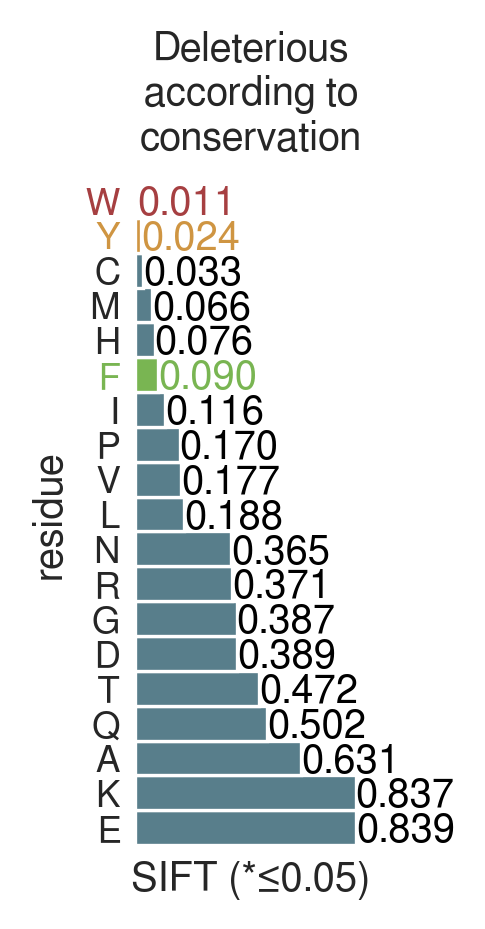

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("ticks")

df = aa_pos_prop_df[["SIFT (*≤0.05)"]].copy()
df = df[~(df.index == 'S')]
df = df.sort_values(by="SIFT (*≤0.05)", ascending=False)
# display(df)


c_l = ['#587E8B'] * 19
c_l[-2] = '#CF9542'
c_l[-1] = "#A63F41"
c_l[-6] = "#79B552"
c_l = [c_l]
print(c_l)
ax = df.plot.barh(
    #     color="#4169e1",
    color=c_l,
    figsize=(1, 3),
    width=1
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()
ax.tick_params(axis='y', which='major', length=0)
# ax.get_xaxis().set_visible(False)

for tick in ax.get_xticklabels():
    tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels():
    tick.set_fontname("FreeSans")

df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows():
    s = str("%.3f" % r["SIFT (*≤0.05)"])
    c = "#000000"
    if r["AA"] == "Y":
        c = "#CF9542"
    elif r["AA"] == "W":
        c = "#A63F41"
    elif r["AA"] == "F":
        c = "#79B552"
    ax.text(r["SIFT (*≤0.05)"], i-0.4,  s, fontname="FreeSans", color=c)

ax.tick_params(axis='both', which='both', length=0)

for ytick in ax.get_yticklabels():
    if ytick.get_text() == 'Y':
        ytick.set_color("#CF9542")
    if ytick.get_text() == 'W':
        ytick.set_color("#A63F41")
    if ytick.get_text() == 'F':
        ytick.set_color("#79B552")

ax.set_xticklabels([])
ax.set_xlabel('SIFT (*≤0.05)', fontname="FreeSans")
ax.xaxis.labelpad = -2
ax.set_ylabel('residue', fontname="FreeSans")
ax.set_title("Deleterious\naccording to\nconservation", fontname="FreeSans")

Text(0.5, 1.0, 'Structure\ndestabilizing')

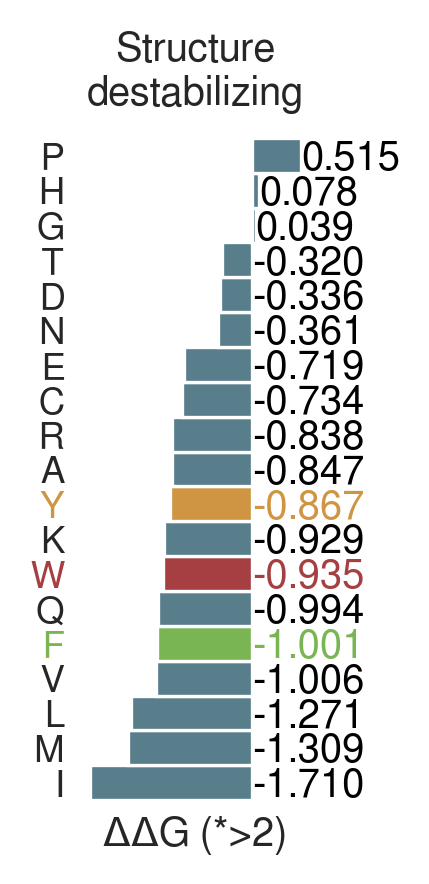

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("ticks")

df = aa_pos_prop_df[["ΔΔG (*>2)"]].copy()
df = df[~(df.index=='S')]
df = df.sort_values(by="ΔΔG (*>2)", ascending=True)
df

c_l = ['#587E8B'] * 19
c_l[-11] = '#CF9542'
c_l[-13] = "#A63F41"
c_l[-15] = "#79B552"
c_l = [c_l]
ax = df.plot.barh(
    color=c_l,
    figsize=(1,3),
    width=1
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()
# plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)
# ax.get_xaxis().set_visible(False)

for tick in ax.get_xticklabels():
    tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels():
    tick.set_fontname("FreeSans")

df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows():
    c = "#000000"
    if r["AA"] == "Y":
        c = "#CF9542"
    elif r["AA"] == "W":
        c = "#A63F41"
    elif r["AA"] == "F":
        c = "#79B552"
    s = str("%.3f" % r["ΔΔG (*>2)"])
    if r["ΔΔG (*>2)"] < 0:
        ax.text(0, i-0.4,  s, fontname="FreeSans", color=c)
    else:
        ax.text(r["ΔΔG (*>2)"], i-0.4,  s, fontname="FreeSans", color=c)


ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_xlabel('ΔΔG (*>2)', fontname="FreeSans")
ax.set_ylabel('', fontname="FreeSans")
ax.xaxis.labelpad = -2

for ytick in ax.get_yticklabels():
    if ytick.get_text() == 'Y':
        ytick.set_color("#CF9542")
    if ytick.get_text() == 'W':
        ytick.set_color("#A63F41")
    if ytick.get_text() == 'F':
        ytick.set_color("#79B552")

ax.set_title("Structure\ndestabilizing", fontname="FreeSans")

In [14]:
wt = 'S'
aa_pos_prop_df["size diff"] = aa_pos_prop_df.apply(lambda r: r["size val"] - aa_pos_prop_df.at[wt, "size val"], axis=1)
aa_pos_prop_df

,case,size,chain type,polar,hydrophobic,iron binding,order,carbonylation,oxygen rich,photooxidation,pathogen,TM stabilizing,common in,hydrophobicity,size val,flexibility,SIFT (*≤0.05),ΔΔG (*>2),size diff
AA,,,,,,,,,,,,,,,,,,,
S,WT,Tiny,,Polar,Hydrophobic,,Disorder promoting,,Oxygen rich,,Pathogen enriched,TM stabilizing,common in turn,-0.8,9.47,-0.424,1.000000,0.0002,0.00
W,Bystrom99,Bulky,Aromatic,Non-polar,Hydrophobic,,Order promoting,,,Prone to photooxidation,,,common in helix,-0.9,21.67,-0.727,0.010752,-0.9352,12.20
Y,ALE,Bulky,Aromatic,Non-polar,Hydrophobic,Iron binding,Order promoting,,Oxygen rich,Prone to photooxidation,,,common in helix,-1.3,18.03,-0.721,0.024042,-0.8668,8.56
A,,Tiny,Aliphatic,Non-polar,Hydrophobic,,,,,,,TM to Thr stabilizing,common in sheet,1.8,11.50,-0.605,0.631117,-0.8466,2.03
T,,Tiny,,Polar,Hydrophobic,,,Carbonylation susceptible,Oxygen rich,,,TM stabilizing,,-0.7,15.77,-0.525,0.471793,-0.3198,6.30
C,,Tiny,,Non-polar,Hydrophobic,Iron binding,,,,Prone to photooxidation,,TM stabilizing,,2.5,13.46,-0.692,0.033226,-0.7342,3.99
G,,Tiny,,Non-polar,Hydrophobic,,"Disorder promoting if in secstruct, Disorder p...",,,,Pathogen enriched,,common in turn,-0.4,3.40,-0.537,0.386961,0.0392,-6.07
N,,Small,,Polar,,,,,Oxygen rich,,,,common in turn,-3.5,12.82,-0.381,0.364775,-0.3608,3.35
P,,Small,,Non-polar,Hydrophobic,,"Disorder promoting if in secstruct, Disorder p...",Carbonylation susceptible,,,Pathogen enriched,,common in turn,-1.6,17.43,-0.271,0.170377,0.5152,7.96


Text(0.5, 1.0, 'Size difference')

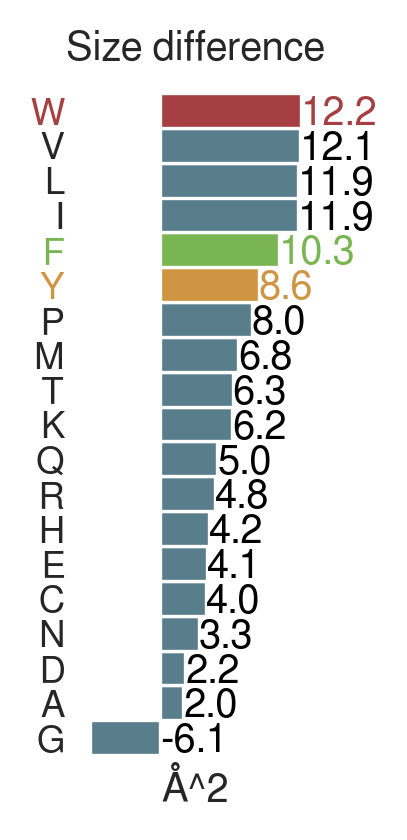

In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("ticks")

df = aa_pos_prop_df[["size diff"]].copy()
df = df[~(df.index=='S')]
df = df.sort_values(by="size diff", ascending=True)
df

c_l = ['#587E8B'] * 19
c_l[-6] = '#CF9542'
c_l[-1] = "#A63F41"
c_l[-5] = "#79B552"
c_l = [c_l]
ax = df.plot.barh(
    color=c_l,
    figsize=(1,3),
    width=1
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()
# plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)
# ax.get_xaxis().set_visible(False)

for tick in ax.get_xticklabels():
    tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels():
    tick.set_fontname("FreeSans")

df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows():
    c = "#000000"
    if r["AA"] == "Y":
        c = "#CF9542"
    elif r["AA"] == "W":
        c = "#A63F41"
    elif r["AA"] == "F":
        c = "#79B552"
    s = str("%.1f" % r["size diff"])
    if r["size diff"] < 0:
        ax.text(0, i-0.4,  s, fontname="FreeSans", color=c)
    else:
        ax.text(r["size diff"], i-0.4,  s, fontname="FreeSans", color=c)
        
for ytick in ax.get_yticklabels():
    if ytick.get_text() == 'Y':
        ytick.set_color("#CF9542")
    if ytick.get_text() == 'W':
        ytick.set_color("#A63F41")
    if ytick.get_text() == 'F':
        ytick.set_color("#79B552")

ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_xlabel("Å^2", fontname="FreeSans")
ax.set_ylabel("", fontname="FreeSans")
ax.xaxis.labelpad = -2

ax.set_title("Size difference", fontname="FreeSans")

In [16]:
wt = 'S'
aa_pos_prop_df["flex diff"] = aa_pos_prop_df.apply(lambda r: r["flexibility"] - aa_pos_prop_df.at[wt, "flexibility"], axis=1)
aa_pos_prop_df

,case,size,chain type,polar,hydrophobic,iron binding,order,carbonylation,oxygen rich,photooxidation,pathogen,TM stabilizing,common in,hydrophobicity,size val,flexibility,SIFT (*≤0.05),ΔΔG (*>2),size diff,flex diff
AA,,,,,,,,,,,,,,,,,,,,
S,WT,Tiny,,Polar,Hydrophobic,,Disorder promoting,,Oxygen rich,,Pathogen enriched,TM stabilizing,common in turn,-0.8,9.47,-0.424,1.000000,0.0002,0.00,0.000
W,Bystrom99,Bulky,Aromatic,Non-polar,Hydrophobic,,Order promoting,,,Prone to photooxidation,,,common in helix,-0.9,21.67,-0.727,0.010752,-0.9352,12.20,-0.303
Y,ALE,Bulky,Aromatic,Non-polar,Hydrophobic,Iron binding,Order promoting,,Oxygen rich,Prone to photooxidation,,,common in helix,-1.3,18.03,-0.721,0.024042,-0.8668,8.56,-0.297
A,,Tiny,Aliphatic,Non-polar,Hydrophobic,,,,,,,TM to Thr stabilizing,common in sheet,1.8,11.50,-0.605,0.631117,-0.8466,2.03,-0.181
T,,Tiny,,Polar,Hydrophobic,,,Carbonylation susceptible,Oxygen rich,,,TM stabilizing,,-0.7,15.77,-0.525,0.471793,-0.3198,6.30,-0.101
C,,Tiny,,Non-polar,Hydrophobic,Iron binding,,,,Prone to photooxidation,,TM stabilizing,,2.5,13.46,-0.692,0.033226,-0.7342,3.99,-0.268
G,,Tiny,,Non-polar,Hydrophobic,,"Disorder promoting if in secstruct, Disorder p...",,,,Pathogen enriched,,common in turn,-0.4,3.40,-0.537,0.386961,0.0392,-6.07,-0.113
N,,Small,,Polar,,,,,Oxygen rich,,,,common in turn,-3.5,12.82,-0.381,0.364775,-0.3608,3.35,0.043
P,,Small,,Non-polar,Hydrophobic,,"Disorder promoting if in secstruct, Disorder p...",Carbonylation susceptible,,,Pathogen enriched,,common in turn,-1.6,17.43,-0.271,0.170377,0.5152,7.96,0.153


Text(0.5, 1.0, 'Flexibility difference')

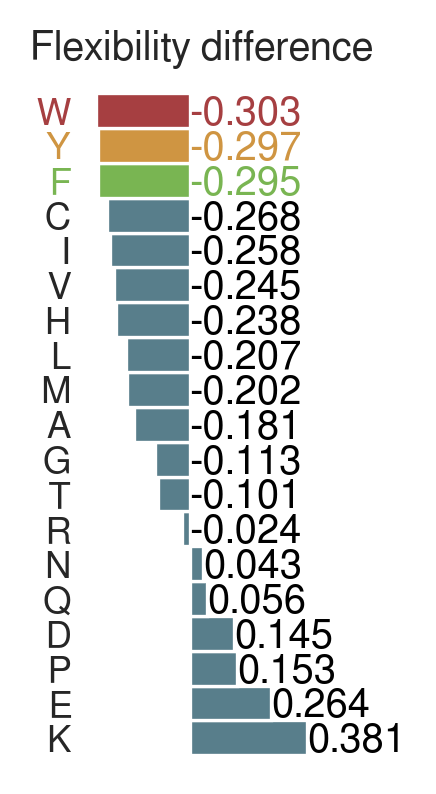

In [17]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("ticks")

df = aa_pos_prop_df[["flex diff"]].copy()
df = df[~(df.index=='S')]
df = df.sort_values(by="flex diff", ascending=False)
df

c_l = ['#587E8B'] * 19
c_l[-2] = '#CF9542'
c_l[-1] = "#A63F41"
c_l[-3] = "#79B552"
c_l = [c_l]
ax = df.plot.barh(
    color=c_l,
    figsize=(1,3),
    width=1
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()
# plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)
# ax.get_xaxis().set_visible(False)

for tick in ax.get_xticklabels():
    tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels():
    tick.set_fontname("FreeSans")

df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows():
    c = "#000000"
    if r["AA"] == "Y":
        c = "#CF9542"
    elif r["AA"] == "W":
        c = "#A63F41"
    elif r["AA"] == "F":
        c = "#79B552"
    s = str("%.3f" % r["flex diff"])
    if r["flex diff"] < 0:
        ax.text(0, i-0.4,  s, fontname="FreeSans", color=c)
    else:
        ax.text(r["flex diff"], i-0.4,  s, fontname="FreeSans", color=c)
        
for ytick in ax.get_yticklabels():
    if ytick.get_text() == 'Y':
        ytick.set_color("#CF9542")
    if ytick.get_text() == 'W':
        ytick.set_color("#A63F41")
    if ytick.get_text() == 'F':
        ytick.set_color("#79B552")

ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_xlabel("", fontname="FreeSans")
ax.set_ylabel("", fontname="FreeSans")
ax.xaxis.labelpad = -2

ax.set_title("Flexibility difference", fontname="FreeSans")

In [18]:
wt = 'S'
aa_pos_prop_df["hydrophob diff"] = aa_pos_prop_df.apply(lambda r: r["hydrophobicity"] - aa_pos_prop_df.at[wt, "hydrophobicity"], axis=1)
aa_pos_prop_df

,case,size,chain type,polar,hydrophobic,iron binding,order,carbonylation,oxygen rich,photooxidation,...,TM stabilizing,common in,hydrophobicity,size val,flexibility,SIFT (*≤0.05),ΔΔG (*>2),size diff,flex diff,hydrophob diff
AA,,,,,,,,,,,,,,,,,,,,,
S,WT,Tiny,,Polar,Hydrophobic,,Disorder promoting,,Oxygen rich,,...,TM stabilizing,common in turn,-0.8,9.47,-0.424,1.000000,0.0002,0.00,0.000,0.0
W,Bystrom99,Bulky,Aromatic,Non-polar,Hydrophobic,,Order promoting,,,Prone to photooxidation,...,,common in helix,-0.9,21.67,-0.727,0.010752,-0.9352,12.20,-0.303,-0.1
Y,ALE,Bulky,Aromatic,Non-polar,Hydrophobic,Iron binding,Order promoting,,Oxygen rich,Prone to photooxidation,...,,common in helix,-1.3,18.03,-0.721,0.024042,-0.8668,8.56,-0.297,-0.5
A,,Tiny,Aliphatic,Non-polar,Hydrophobic,,,,,,...,TM to Thr stabilizing,common in sheet,1.8,11.50,-0.605,0.631117,-0.8466,2.03,-0.181,2.6
T,,Tiny,,Polar,Hydrophobic,,,Carbonylation susceptible,Oxygen rich,,...,TM stabilizing,,-0.7,15.77,-0.525,0.471793,-0.3198,6.30,-0.101,0.1
C,,Tiny,,Non-polar,Hydrophobic,Iron binding,,,,Prone to photooxidation,...,TM stabilizing,,2.5,13.46,-0.692,0.033226,-0.7342,3.99,-0.268,3.3
G,,Tiny,,Non-polar,Hydrophobic,,"Disorder promoting if in secstruct, Disorder p...",,,,...,,common in turn,-0.4,3.40,-0.537,0.386961,0.0392,-6.07,-0.113,0.4
N,,Small,,Polar,,,,,Oxygen rich,,...,,common in turn,-3.5,12.82,-0.381,0.364775,-0.3608,3.35,0.043,-2.7
P,,Small,,Non-polar,Hydrophobic,,"Disorder promoting if in secstruct, Disorder p...",Carbonylation susceptible,,,...,,common in turn,-1.6,17.43,-0.271,0.170377,0.5152,7.96,0.153,-0.8


Text(0.5, 1.0, 'hydrophobicity\ndifference')

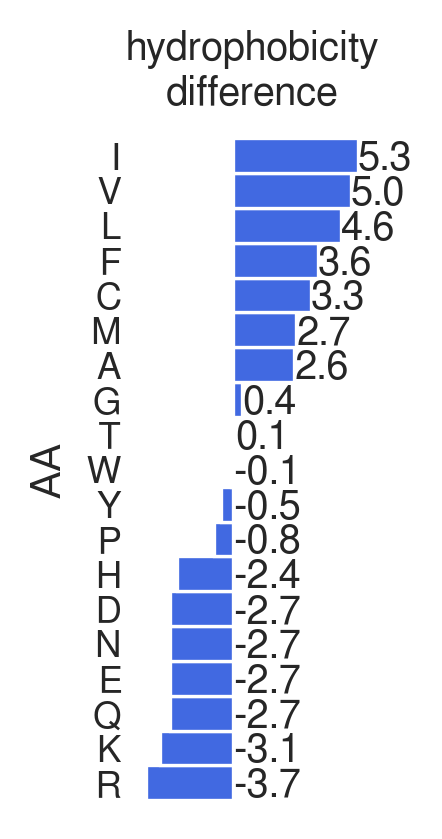

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("ticks")

df = aa_pos_prop_df[["hydrophob diff"]].copy()
df = df[~(df.index=='S')]
df = df.sort_values(by="hydrophob diff", ascending=True)
df

# df = df[-10:]
ax = df.plot.barh(
#     y="count",
#     x="index",
#     color="#4C72B0",
    color="#4169e1",
    figsize=(1,3),
    width=1
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()
# plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)
# ax.get_xaxis().set_visible(False)

for tick in ax.get_xticklabels():
    tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels():
    tick.set_fontname("FreeSans")

df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows():
    s = str("%.1f" % r["hydrophob diff"])
    if r["hydrophob diff"] < 0:
        ax.text(0, i-0.4,  s, fontname="FreeSans")
    else:
        ax.text(r["hydrophob diff"], i-0.4,  s, fontname="FreeSans")

ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_xlabel("", fontname="FreeSans")
ax.xaxis.labelpad = -2

ax.set_title("hydrophobicity\ndifference", fontname="FreeSans")

In [20]:
# For display in slides
df = aa_pos_prop_df[[#'case',
                     'size', 'chain type', 'polar', 'common in',
                     'hydrophobic',
                     'iron binding',
                     'carbonylation',
                     'oxygen rich',
                     'photooxidation',
                     'pathogen',
                     'order',
                     'TM stabilizing',]]
df = df.reindex(['S', 'W', 'Y', 'F', 'I','V', 'L','N', 'D', 'E', 'C', 'P', 'R', 'M', 'G', 'H', 'A', 'K', 'T', 'Q'])
df

,size,chain type,polar,common in,hydrophobic,iron binding,carbonylation,oxygen rich,photooxidation,pathogen,order,TM stabilizing
AA,,,,,,,,,,,,
S,Tiny,,Polar,common in turn,Hydrophobic,,,Oxygen rich,,Pathogen enriched,Disorder promoting,TM stabilizing
W,Bulky,Aromatic,Non-polar,common in helix,Hydrophobic,,,,Prone to photooxidation,,Order promoting,
Y,Bulky,Aromatic,Non-polar,common in helix,Hydrophobic,Iron binding,,Oxygen rich,Prone to photooxidation,,Order promoting,
F,Bulky,Aromatic,Non-polar,common in helix,Hydrophobic,,,,,,Order promoting,
I,Bulky,Aliphatic,Non-polar,common in helix,Hydrophobic,,,,,,Order promoting,TM to Thr stabilizing
V,Bulky,Aliphatic,Non-polar,common in helix,Hydrophobic,,,,,,,TM to Thr stabilizing
L,Bulky,Aliphatic,Non-polar,"common in helix, common in sheet",Hydrophobic,,,,,,,
N,Small,,Polar,common in turn,,,,Oxygen rich,,,,
D,Small,,"Charged, Polar",,,Iron binding,,Oxygen rich,,,,


In [21]:
# For use with UpSetR
df = aa_pos_prop_df[[#'case',
                     'size', 'chain type', 'polar', 'common in',
                     'hydrophobic',
                     'iron binding',
                     'carbonylation',
                     'oxygen rich',
                     'photooxidation',
                     'pathogen',
                     'order',
                     'TM stabilizing',]]
df

,size,chain type,polar,common in,hydrophobic,iron binding,carbonylation,oxygen rich,photooxidation,pathogen,order,TM stabilizing
AA,,,,,,,,,,,,
S,Tiny,,Polar,common in turn,Hydrophobic,,,Oxygen rich,,Pathogen enriched,Disorder promoting,TM stabilizing
W,Bulky,Aromatic,Non-polar,common in helix,Hydrophobic,,,,Prone to photooxidation,,Order promoting,
Y,Bulky,Aromatic,Non-polar,common in helix,Hydrophobic,Iron binding,,Oxygen rich,Prone to photooxidation,,Order promoting,
A,Tiny,Aliphatic,Non-polar,common in sheet,Hydrophobic,,,,,,,TM to Thr stabilizing
T,Tiny,,Polar,,Hydrophobic,,Carbonylation susceptible,Oxygen rich,,,,TM stabilizing
C,Tiny,,Non-polar,,Hydrophobic,Iron binding,,,Prone to photooxidation,,,TM stabilizing
G,Tiny,,Non-polar,common in turn,Hydrophobic,,,,,Pathogen enriched,"Disorder promoting if in secstruct, Disorder p...",
N,Small,,Polar,common in turn,,,,Oxygen rich,,,,
P,Small,,Non-polar,common in turn,Hydrophobic,,Carbonylation susceptible,,,Pathogen enriched,"Disorder promoting if in secstruct, Disorder p...",
